In [8]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.chdir('C:/Users/EmilyP/meazon/Meazon-PROJECTS - DEDDIE-analysis/KPIs Summary/')
files = os.listdir()
monthfiles = [s for s in files if s.startswith(("1-", "2-", "3-","4-","5-"))]
monthfiles

['1-2024', '2-2024', '3-2024', '4-2024', '5-2024 (until 22-5)']

In [3]:
df = pd.DataFrame([])
i=0
for name in ['Jan','Feb','Mar','Apr','May']:
    os.chdir('C:/Users/EmilyP/meazon/Meazon-PROJECTS - DEDDIE-analysis/KPIs Summary/'+monthfiles[i]+'/')
    tmp = pd.read_excel('HEDNO_KPIs_simplified_'+name+'_2024.xlsx', engine='openpyxl')
    tmp = tmp.loc[tmp['Nr. of power alarms']>0,['Transformer','Nr. of power alarms']]
    tmp['month'] = name+' 2024'
    df = pd.concat([df,tmp])
    i += 1
    os.chdir('..')
df['Nr. of power alarms'] = df['Nr. of power alarms'].astype(int)
print(df)

   Transformer  Nr. of power alarms     month
0       ΜΠ-004                 1920  Jan 2024
1       ΜΠ-013                 1915  Jan 2024
2       ΜΝ-010                  511  Jan 2024
3       MM-185                  297  Jan 2024
4       ΜΠ-297                   76  Jan 2024
5       ΜΜ-423                   61  Jan 2024
6       ΜΠ-110                   24  Jan 2024
7       ΜΠ-046                    7  Jan 2024
8       MM-359                    5  Jan 2024
9       ΜΤ-055                    2  Jan 2024
10      ΜΠ-112                    1  Jan 2024
0       MM-185                   75  Feb 2024
11      ΜΜ-423                  313  Feb 2024
12      ΜΝ-010                  113  Feb 2024
15      ΜΠ-004                 1422  Feb 2024
17      ΜΠ-013                 1514  Feb 2024
19      ΜΠ-017                   94  Feb 2024
23      ΜΠ-112                    5  Feb 2024
28      ΜΠ-297                   27  Feb 2024
0       ΜΠ-004                  680  Mar 2024
1       ΜΜ-423                  66

In [4]:
# tmp['Transformer'].unique()
import plotly.express as px


In [22]:
fig = px.scatter_3d(df, x='month', y='Transformer', z='Nr. of power alarms',
                    title='Power Alarms for Each Transformer Across Each Month',
                    labels={'month': 'Month', 'Transformer': 'Transformer', 'Nr. of power alarms': 'Nr. of Power Alarms'},
                    color='Nr. of power alarms')

fig.show()

In [5]:
import plotly.graph_objs as go
import plotly.colors as pc


In [23]:
# os.getcwd()

In [6]:
months = df['month'].unique()
transformers = df['Transformer'].unique()

month_mapping = {month: i for i, month in enumerate(sorted(months))}
transformer_mapping = {trans: i for i, trans in enumerate(sorted(transformers))}

df['month_num'] = df['month'].map(month_mapping)
df['transformer_num'] = df['Transformer'].map(transformer_mapping)

# Create a color palette
colors = pc.qualitative.Plotly

# Create the 3D bar plot
fig = go.Figure()

for i, transformer in enumerate(transformers):
    color = colors[i % len(colors)]
    for month in months:
        df_filtered = df[(df['Transformer'] == transformer) & (df['month'] == month)]
        if not df_filtered.empty:
            month_num = df_filtered['month_num'].values[0]
            transformer_num = df_filtered['transformer_num'].values[0]
            alarms = df_filtered['Nr. of power alarms'].values[0]
            
            fig.add_trace(go.Scatter3d(
                x=[month_num, month_num],
                y=[transformer_num, transformer_num],
                z=[0, alarms],
                mode='lines',
                line=dict(color=color, width=10),
                name=f"{transformer} - {month}",
                text=f"Transformer: {transformer}<br>Month: {month}<br>Power Alarms: {alarms}",
                hoverinfo='text'
            ))

fig.update_layout(
    title='3D Bar Plot of Power Alarms',
    scene=dict(
        xaxis=dict(title='Month', tickvals=list(month_mapping.values()), ticktext=list(month_mapping.keys())),
        yaxis=dict(title='Transformer', tickvals=list(transformer_mapping.values()), ticktext=list(transformer_mapping.keys())),
        zaxis=dict(title='Nr. of Power Alarms')
    )
)

fig.show()
fig.write_html("3dpowerAlarms.html")


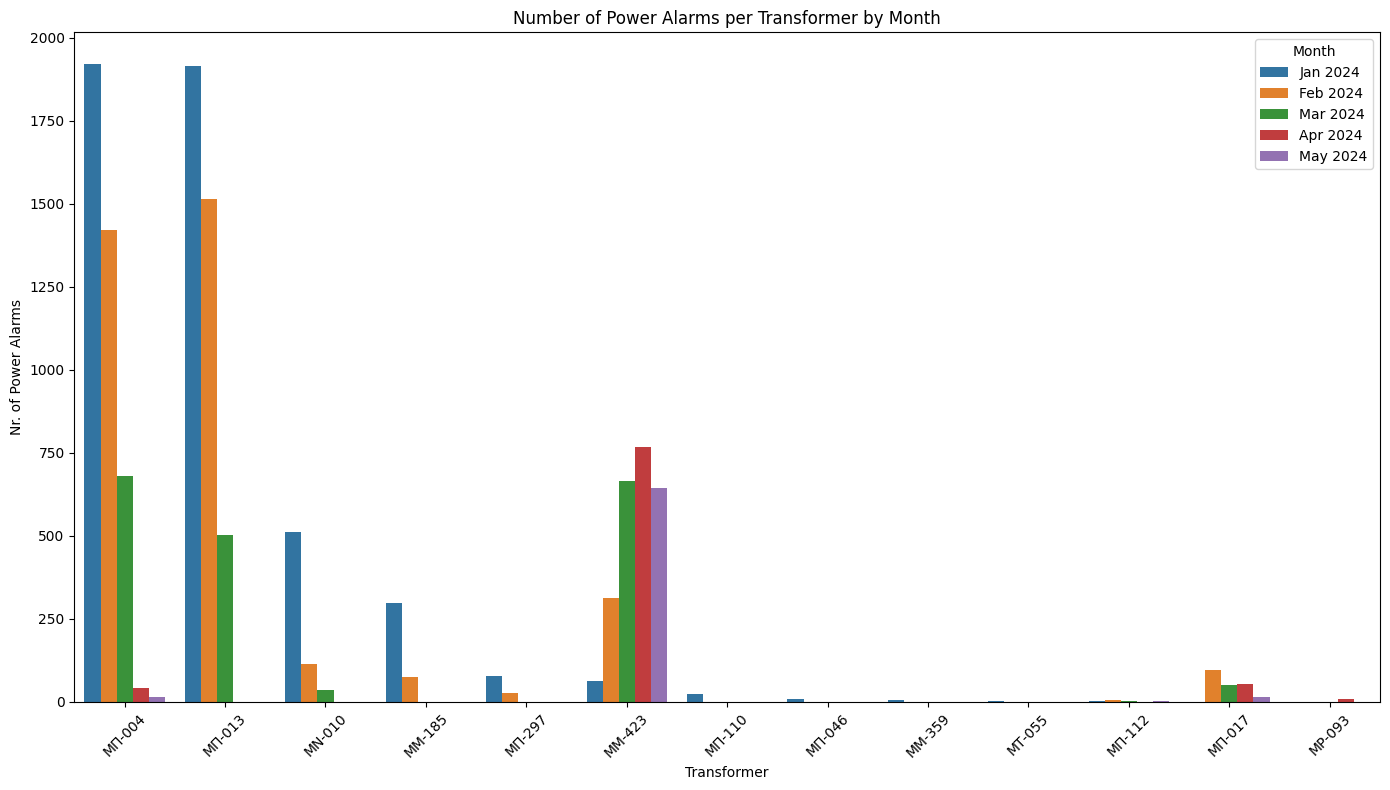

In [14]:
# 2D plot

# Create the grouped bar plot
fig = plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Transformer', y='Nr. of power alarms', hue='month')

# Set plot labels and title
plt.xlabel('Transformer')
plt.ylabel('Nr. of Power Alarms')
plt.title('Number of Power Alarms per Transformer by Month')
plt.xticks(rotation=45)
plt.legend(title='Month')
plt.tight_layout()
plt.savefig('groupedPowerAlarmsPlot.png', dpi=300)
# Show the plot
# plt.show()

In [13]:
plt.savefig('groupedPowerAlarmsPlot.png', dpi=300)

<Figure size 640x480 with 0 Axes>